### This project converts the human “small/medium-scale protein-protein interactions” data obtained from wormnet webpage into a network graph and proceeds to  explore and analyze the graph

In [1]:
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
import csv
names1 = []

#decomposing the data into a tuple containing the nodes and edge weight 
with open('protein_dataHuman.txt', newline='') as csvfile:
    graph_data2 = csv.reader(csvfile, delimiter='\t') 
    for row in graph_data2:
        newtuple = (row[0], row[1], row[2])
        names1.append(newtuple)

In [3]:
#names1
#newset

### Building the corresponding network (g) with Networkx

In [4]:
newset = set(node[0] for node in names1)  #creating a set of the unique proteins to be used as nodes
g = nx.Graph() #creating graph g

for mynode in newset:
    g.add_node(mynode) #adding the nodes in the graph
for mytuple in names1:
    g.add_edge(mytuple[0], mytuple[1], weight= float(mytuple[2])) #adding the edges between the nodes

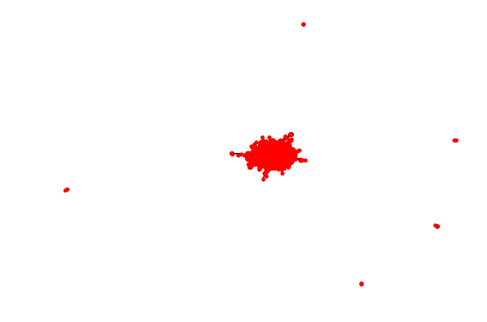

In [5]:
%matplotlib inline
#nx.draw(g, with_labels=True)

nx.draw(g, node_size = 10)

### Calculating the number of nodes, number of edges and the average degree of the network

In [6]:
g.order()  #number of nodes

4227

In [7]:
g.size()  #number of edges:   we can also use len(g.edges())

39484

In [26]:
total_sum = 0
for i in range(0, len(newset)-1):
    total_sum += g.degree(list(newset)[i])

In [29]:
average_deg = total_sum/len(newset) #average degree of network
print("The total degree of the network is: ", total_sum, " and the average degree is: ", average_deg)

The total degree of the network is:  75294  and the average degree is:  22.204069595989385


In [30]:
nx.density(g) #density of network  -->d = (2*g.size())/(g.order()*(g.order()-1))

0.004420683253297739

### Finding the minimum spanning tree in g and drawing it

In [9]:
nx.minimum_spanning_tree(g)

In [10]:
#findig the minimum spanning tree using boruvka algorithm ie subgraph of g with the minimum sum of edge weights
from networkx.algorithms import tree
mst = tree.minimum_spanning_edges(g, algorithm='boruvka', data=False)
edgelist = list(mst)
sorted(edgelist)

[('AC7.2', 'T27F2.1'),
 ('AH6.1', 'ZC434.6'),
 ('B0024.10', 'Y92H12A.2'),
 ('B0024.11', 'F35H8.5'),
 ('B0024.14', 'T02C5.5'),
 ('B0024.15', 'K01A11.2'),
 ('B0024.6', 'ZC434.6'),
 ('B0024.8', 'K12C11.2'),
 ('B0024.9', 'C08B11.7'),
 ('B0025.1', 'C56C10.1'),
 ('B0025.2', 'K02D7.2'),
 ('B0025.4', 'ZK1053.5'),
 ('B0034.3', 'Y54F10AM.2'),
 ('B0035.1', 'C27C12.2'),
 ('B0035.10', 'Y74C9A.4'),
 ('B0035.11', 'Y43C5A.2'),
 ('B0035.12', 'T07D3.7'),
 ('B0035.14', 'C42D8.8'),
 ('B0035.3', 'ZK270.2'),
 ('B0035.4', 'C44B11.3'),
 ('B0035.5', 'C09B8.6'),
 ('B0035.7', 'T05F1.8'),
 ('B0035.8', 'F46F11.2'),
 ('B0035.9', 'F15B10.2'),
 ('B0041.4', 'Y54F10AM.2'),
 ('B0041.6', 'T07D3.7'),
 ('B0047.2', 'Y108G3AL.1'),
 ('B0047.3', 'M7.1'),
 ('B0205.11', 'Y39A1C.3'),
 ('B0205.3', 'F38E11.2'),
 ('B0205.3', 'T04C10.2'),
 ('B0205.4', 'C27C12.2'),
 ('B0205.6', 'C10E2.3'),
 ('B0207.6', 'C42D8.8'),
 ('B0212.1', 'F48F7.1'),
 ('B0213.10', 'C32D5.9'),
 ('B0213.11', 'C32D5.9'),
 ('B0213.12', 'C32D5.9'),
 ('B0213.14', 'C32D

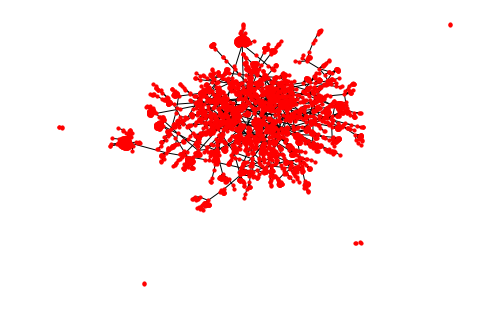

In [11]:
#drawing the minimum spanning tree
nx.draw(nx.minimum_spanning_tree(g),node_size = 10)

### Drawing the degree distribution histogram

Text(0.5,0,'Degree')

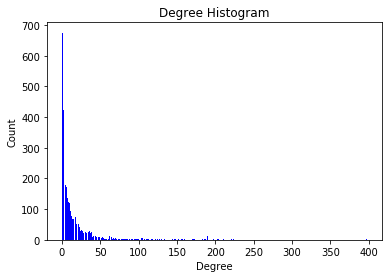

In [12]:
import collections
import matplotlib.pyplot as plt
import networkx as nx

degree_list = sorted([d for n, d in g.degree()])  # sorted list of degrees
degreeCount = collections.Counter(degree_list)
deg, mycount = zip(*degreeCount.items())
plt.bar(deg, mycount, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")


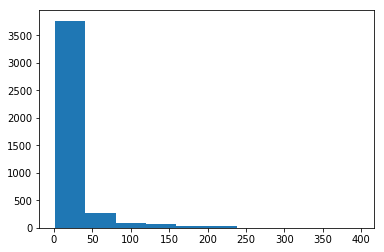

In [13]:
#for a graphical better representation
plt.hist(list(dict(nx.degree(g)).values()))   #or plt.hist(nx.degree_histogram(g))
plt.show()

### Finding the Largest Connected Component of g

In [14]:
connected_comp = sorted(nx.connected_component_subgraphs(g), key=len, reverse=True)
connected_comp_big = connected_comp[0]
list(connected_comp_big)

['F58A3.1',
 'W01C9.4',
 'ZK550.4',
 'Y47D3A.21',
 'K05F1.3',
 'F10C5.1',
 'ZK829.4',
 'F57B9.7',
 'R10E4.5',
 'ZK328.5',
 'C53B4.7',
 'W02F12.5',
 'ZK783.1',
 'W02D7.7',
 'C39E9.10',
 'F33E11.6',
 'T23G5.1',
 'W06H8.8',
 'C25A1.13',
 'K04G7.11',
 'Y47D3A.4',
 'H24K24.3',
 'ZK507.6',
 'T20B12.8',
 'K08H2.6',
 'Y106G6H.3',
 'ZC247.3',
 'C07H6.5',
 'C25A1.8',
 'F58A4.10',
 'F39B1.1',
 'C44E12.3',
 'C25E10.2',
 'Y113G7B.24',
 'R74.1',
 'K12H4.8',
 'C50D2.7',
 'K08D10.2',
 'T19B4.1',
 'F01G4.1',
 'F43G9.1',
 'C44B11.3',
 'F59E10.2',
 'F54E12.2',
 'C56G2.7',
 'R04D3.1',
 'Y39B6A.3',
 'F49E7.1',
 'C03D6.5',
 'K10D2.6',
 'F39H11.5',
 'F54D8.2',
 'C30F12.7',
 'C14B9.2',
 'Y22D7AL.5',
 'C25A1.7',
 'T01H8.2',
 'D1046.5',
 'C30C11.4',
 'F21C3.5',
 'R06B9.1',
 'C04G2.6',
 'F55C5.8',
 'F10G7.1',
 'D1054.13',
 'Y46G5A.5',
 'B0213.14',
 'K01G5.4',
 'F08B12.1',
 'H38K22.2',
 'C07H6.8',
 'K06C4.12',
 'M01E11.1',
 'F01D4.9',
 'F09E8.2',
 'B0416.6',
 'T24D1.4',
 'C44E4.6',
 'C04G6.3',
 'Y54G11A.7',
 'H34

### Drawing the largest component

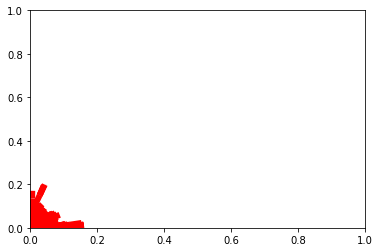

In [15]:
pos = nx.spring_layout(g)
nx.draw_networkx_edges(connected_comp[0], pos, with_labels=False, edge_color='r', width=6.0)

### Finding the center, diameter and 3-nodes_clique communities of the largest component

In [16]:
from networkx.algorithms.approximation import clique
from networkx.algorithms.community import k_clique_communities
f = connected_comp[0]

# finding the diameter of LC
print ('The LC diameter is: ',nx.diameter(f))

The LC diameter is:  8


In [18]:
#finding the center of the LC (set of nodes with eccentricity equal to radius)
print ('The center of LC is: ',nx.center(f))

The center of LC is:  ['Y47D3A.4', 'ZK507.6', 'F01G4.1', 'C44B11.3', 'C14B9.2', 'Y22D7AL.5', 'C30C11.4', 'K06C4.12', 'H34C03.2', 'T23D8.6', 'F55G1.3', 'K01G5.2', 'Y92C3B.2', 'ZC101.2', 'F58F6.4', 'B0414.2', 'F56D12.5', 'F25B3.6', 'Y71H2AM.23', 'F56A8.6', 'B0035.10', 'C02H7.1', 'F40F8.8', 'Y116A8C.36', 'F54B3.3', 'C48G7.3', 'C50F4.13', 'B0464.2', 'F56F3.5', 'F08G2.3', 'F45E1.6', 'M04F3.1', 'F59A7.4', 'F58E10.3', 'ZK973.9', 'T05G5.10', 'Y105E8B.8', 'ZK131.5', 'W08F4.8', 'H02I12.7', 'F22F1.1', 'F43G9.6', 'ZK742.1', 'B0365.3', 'F26D10.3', 'W10C8.2', 'F41G4.2', 'Y34B4A.8', 'T04H1.4', 'R06A10.2', 'T04C12.4', 'T05B11.3', 'R151.7', 'K01H12.2', 'R107.8', 'F59A2.3', 'R10E4.4', 'Y102A5A.1', 'ZK593.6', 'R107.7', 'T08A9.1', 'F47D12.4', 'F43E2.7', 'T09B9.4', 'R10E11.1', 'C07G2.2', 'H06O01.2', 'F35H12.3', 'T14G11.3', 'ZK1128.5', 'K12D12.1', 'ZK131.4', 'ZK131.7', 'C41C4.8', 'F07B7.3', 'C16A3.7', 'T05C12.7', 'F07B7.4', 'B0414.3', 'F45F2.12', 'W06E11.1', 'F35F11.1', 'K08A8.3', 'F36A4.7', 'C49H3.10', 'R0

In [20]:
# calculating the number  of clique communities  of 3 nodes
print ('There are ', len(list(k_clique_communities(f, 3))),'clique communities in LC')

There are  104 clique communities in LC


In [24]:
#finding the most influential protein using pagerank function
pagerank_nx = nx.pagerank_scipy(f)
sorted_pr = sorted(pagerank_nx.items(), reverse=True, key=lambda k_v: k_v[1])
print ('degree: ', f.degree(sorted_pr[2]),'\n')

degree:  [('Y108G3AL.1', 221)] 



In [25]:
# 'Y108G3AL.1' has the most influential and would potentially have biggest effect on network if deleted

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import operator
%matplotlib inline

In [3]:
protein_data = pd.read_table("protein_data.txt", names = ['source', 'target', 'weight'])

In [4]:
protein_data.head()

,source,target,weight
0,AC3.3,AC3.4,2.945855
1,AC3.3,C03A7.14,2.895269
2,AC3.3,C05D2.1,2.390948
3,AC3.3,C37C3.6,2.945855
4,AC3.3,Y39B6A.1,2.852143


In [5]:
G = nx.Graph(protein_data)

In [6]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 1387\nNumber of edges: 1648\nAverage degree:   2.3764'